# Face generation using GMM and PCA

In [1]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import logging
import matplotlib.pyplot as plt
%matplotlib inline
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


In [2]:
lfw_people = fetch_lfw_people(resize=0.2)
lfw_people.data.shape

(13233, 450)

In [3]:
n_samples, height, width = lfw_people.images.shape
print(n_samples, height, width)

13233 25 18


In [4]:
print('using all the 13233 examples')
X = lfw_people.data



using all the 13233 examples


plotting some of the faces in the original dataset


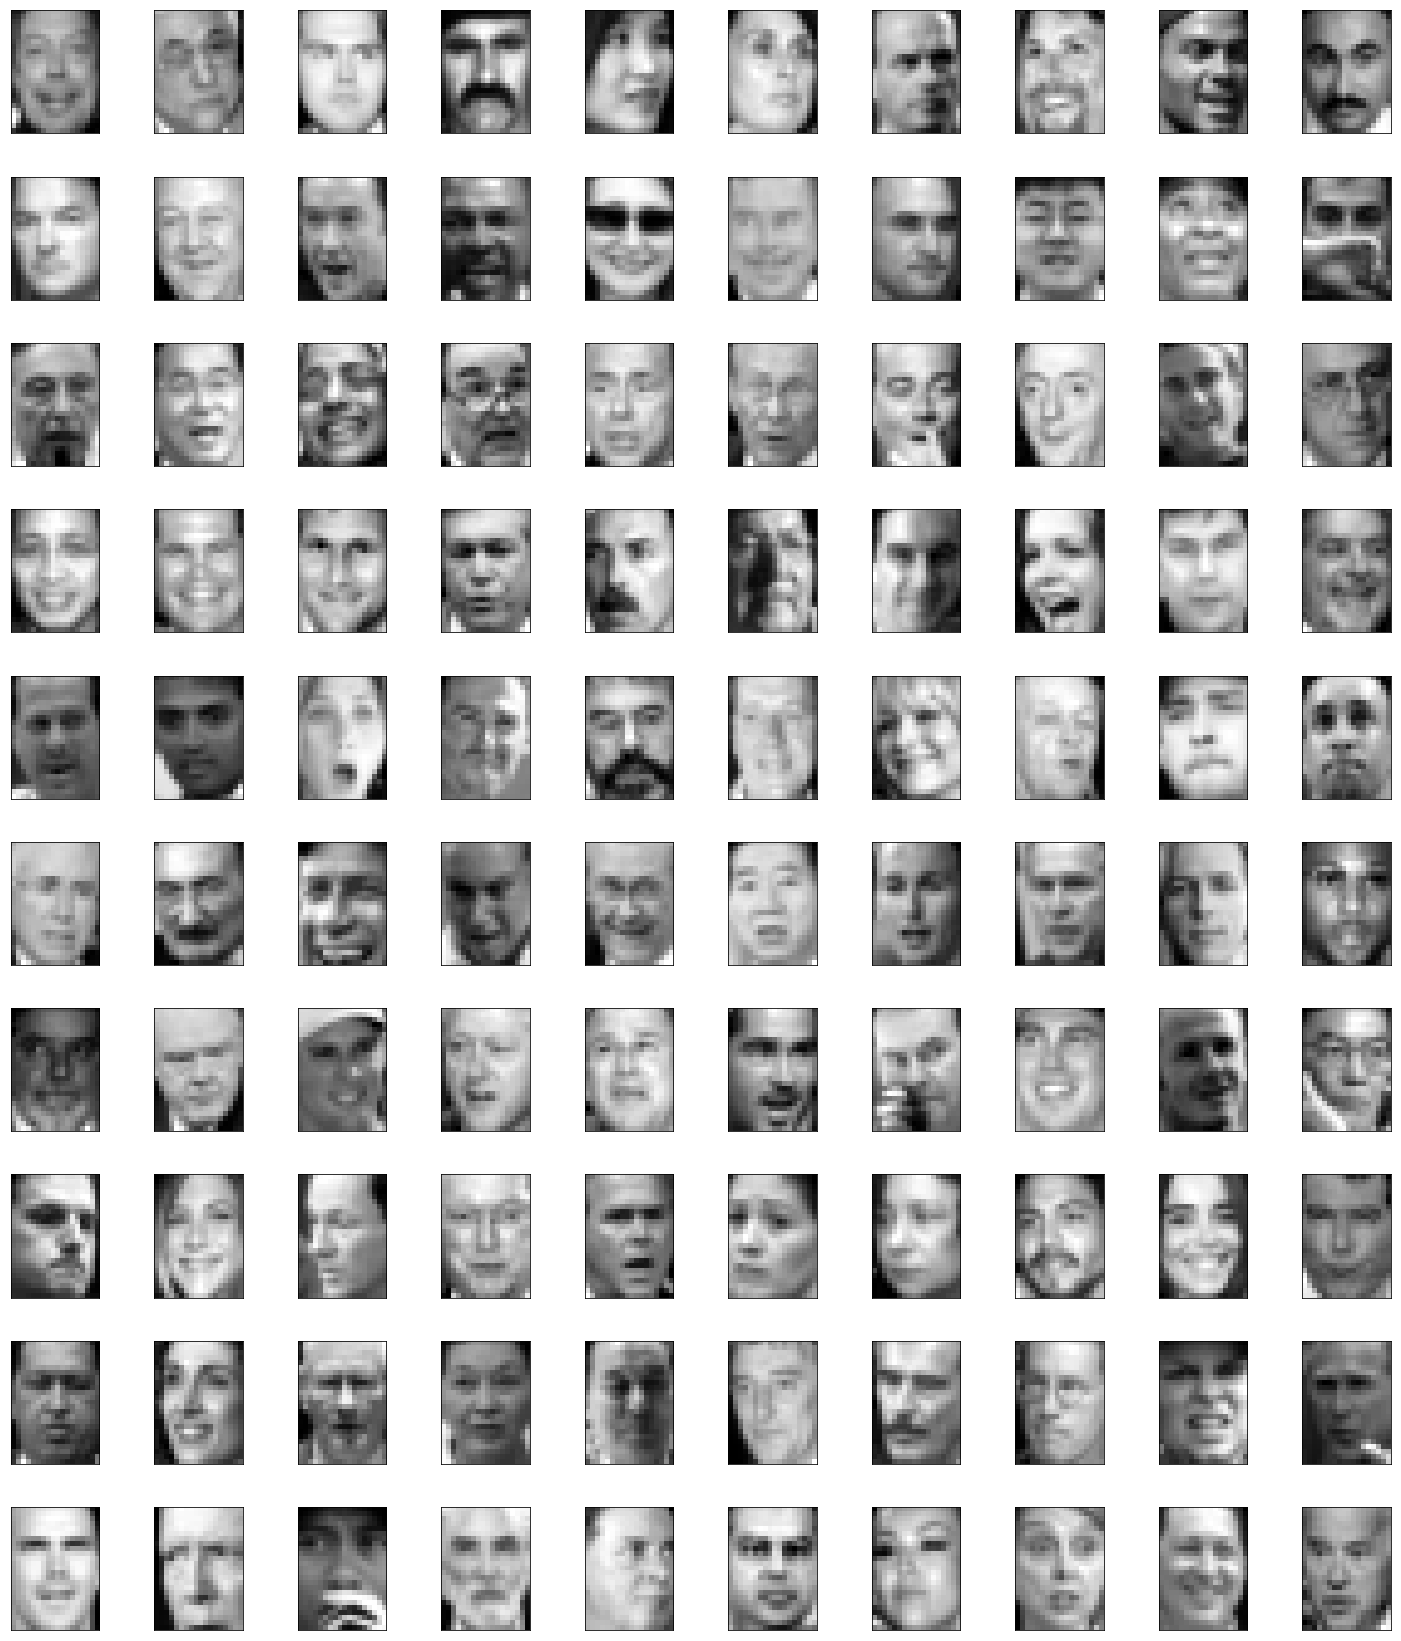

In [5]:
def plot_faces(images,h=height, w=width, n_row=10, n_col=10):
    
    plt.figure(figsize=(2 * n_col, 2.5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        
        plt.xticks(())
        plt.yticks(())
print('plotting some of the faces in the original dataset')
plot_faces(X, height, width)

In [6]:
from sklearn.decomposition import PCA
print('performing PCA on the dataset, 90% of the variance are preserved')
pca = PCA(0.90, whiten=True)
X_pca = pca.fit_transform(X)
print('eigenface number:', X_pca.shape[1])

performing PCA on the dataset, 90% of the variance are preserved
eigenface number: 46


plotting the leading 40 eigenfaces


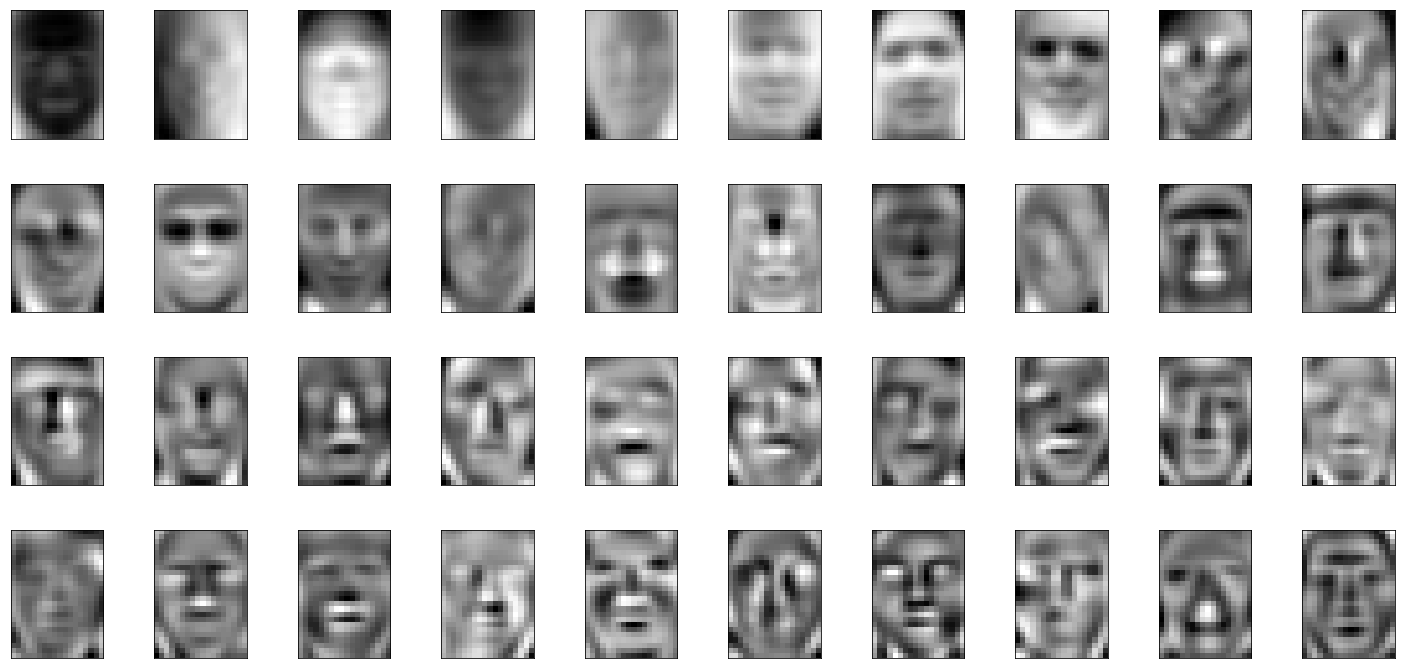

In [7]:
print('plotting the leading 40 eigenfaces')
plot_faces(pca.components_, height, width, n_row=4, n_col=10)


In [8]:
from sklearn.mixture import GaussianMixture
K = 10
print('GMM component number: ', K)
gmm = GaussianMixture(n_components=K, covariance_type='diag')
gmm.fit(X_pca)

print(gmm.converged_)



GMM component number:  10
True


In [9]:
print('using the trained Gaussian model to generate new data samples')
n_generated = 100
print('number of generated samples:', n_generated)
X_generated = gmm.sample(n_generated)[0]

X_generated.shape

using the trained Gaussian model to generate new data samples
number of generated samples: 100


(100, 46)

In [10]:
print('now performing the PCA reconstruction!')
X_new = pca.inverse_transform(X_generated)



now performing the PCA reconstruction!


now plotting the new generated unseen face


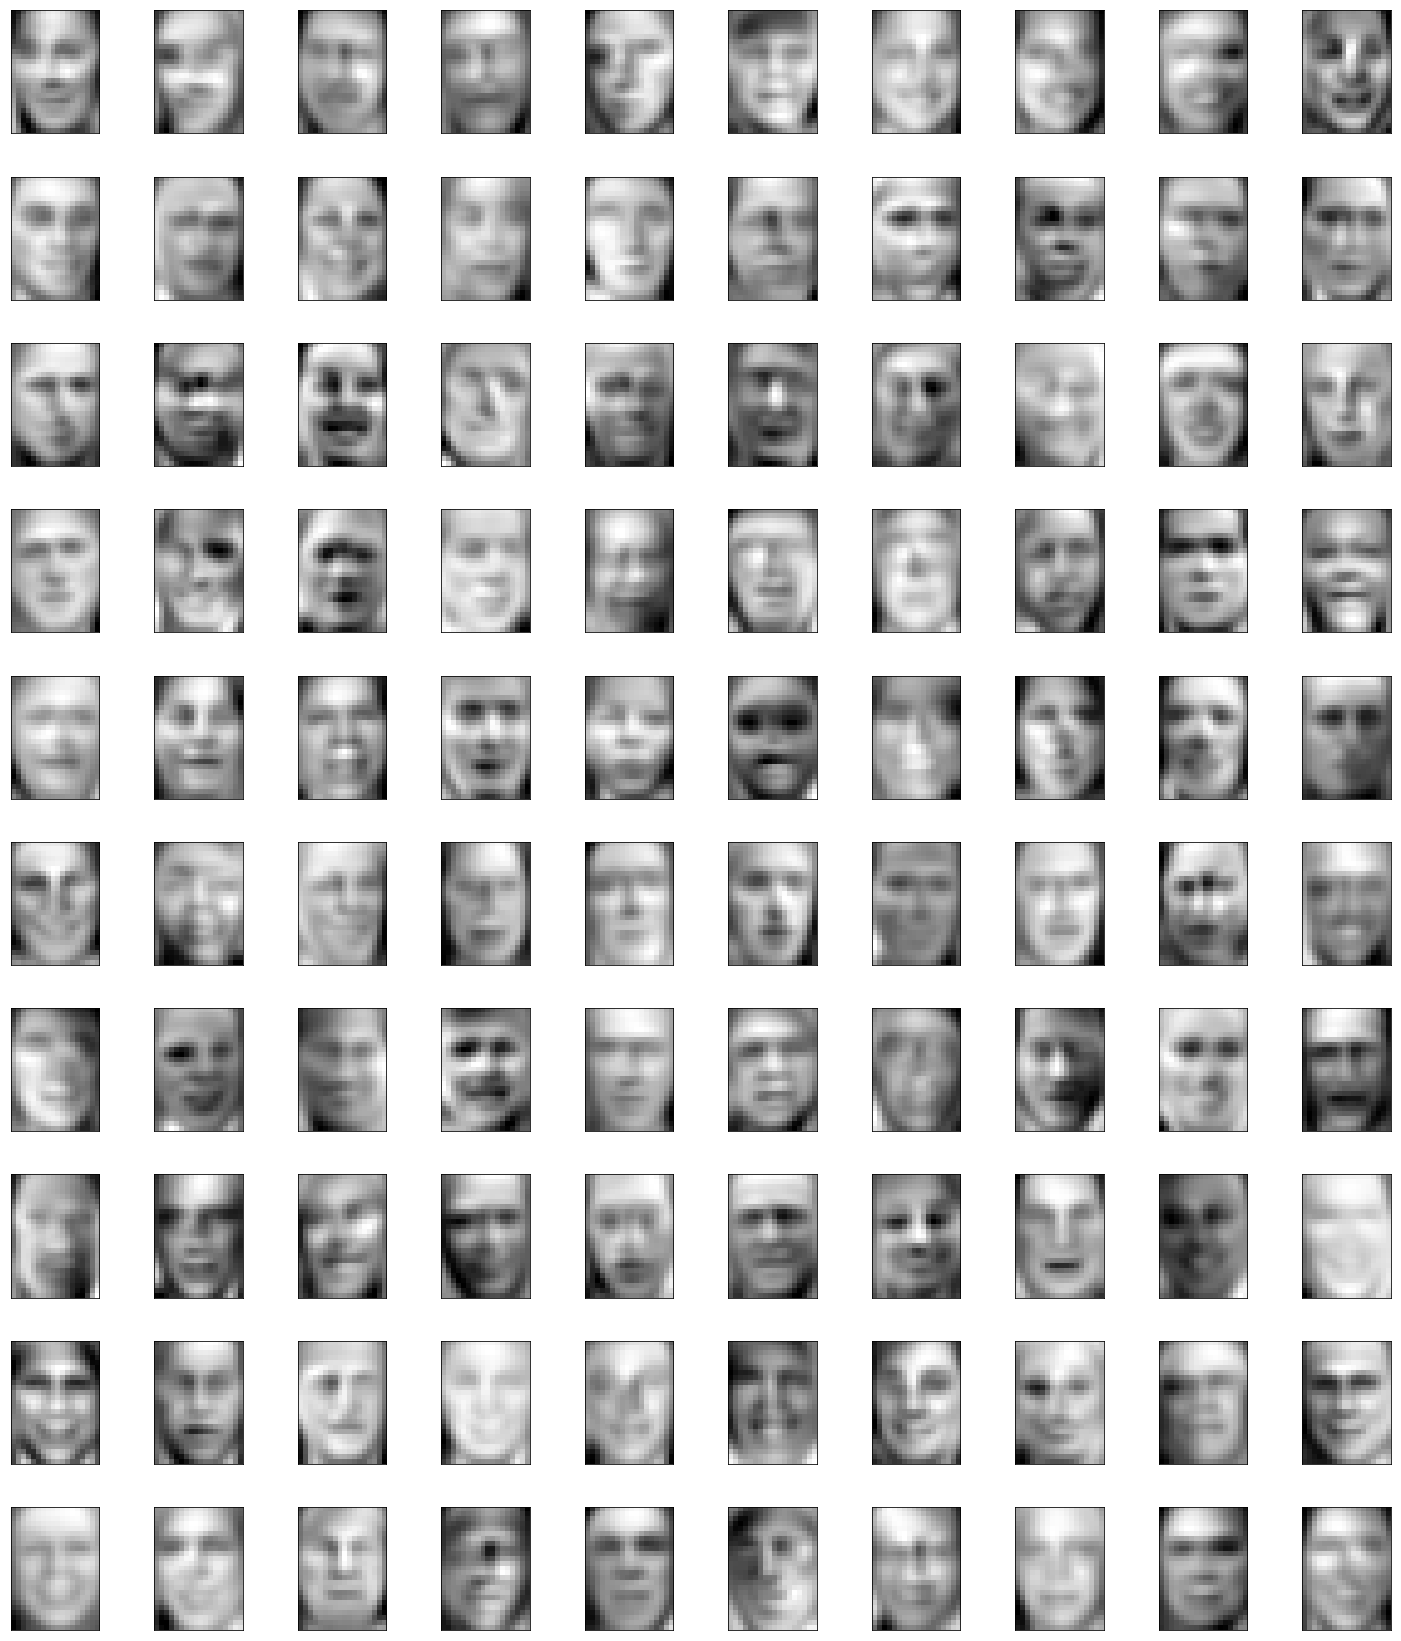

In [11]:
print('now plotting the new generated unseen face')
plot_faces(X_new)